# Machine Learning LAB 3
# IMAGE CLASSIFICATION WITH NEURAL NETWORKS
Course 2022/23: P. Zanuttigh, F. Barbato, M. Mel

The notebook contains some simple tasks to be performed with **NEURAL NETWORKS (NNs)**. <br>
Complete all the **required code sections** and **answer to all the questions**. <br>

### IMPORTANT for the evaluation score:
1. **Read carefully all cells** and **follow the instructions**
2. **Re-run all the code from the beginning** to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebooks.
3. Make sure to fill the code in the appropriate places **without modifying the template**, otherwise you risk breaking later cells.
4. Please **submit the jupyter notebook file (.ipynb)**, do not submit python scripts (.py) or plain text files. **Make sure that it runs fine with the restat&run all command**.
5. **Answer the questions in the appropriate cells**, not in the ones where the question is presented.

# Clothes Classification with Neural Networks

In this notebook we are going to explore the Neural Networks for image classification. We are going to use [**Fashion MNIST**](https://github.com/zalandoresearch/fashion-mnist), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [1]:
# load the required packages and check Scikit-learn version
%matplotlib inline  

import numpy as np
from matplotlib import pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearnex import patch_sklearn # if you have an Intel CPU and have installed the Intel MKL 
patch_sklearn()                     # library you can uncomment these lines for a speedup

scikit-learn version:  1.0.2


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

Place your **name** and **ID number** (matricola) in the cell below. <br>
Also recall to **save the file as Surname_Name_LAB3.ipynb**

**Student name**: Giuseppe Viterbo<br>
**ID Number**: 2086516

# A) Hyperparameter Search

**TO DO A.0:** **Set** the random **seed** using your **ID**. If you need to change it for testing add a constant explicitly, eg.: `ID = 1234567 + 1`.

In [28]:
ID = 2086516
np.random.seed(ID)

Before proceding to the training steps, we **load the dataset**. <br>
The **split** is **performed after applying a random permutation** to the dataset, such permutation will **depend on the seed** you set above.<br><br>
**DO NOT CHANGE THE PRE-WRITTEN CODE UNLESS OTHERWISE SPECIFIED**

In [29]:
# load the MNIST dataset
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data to [0, 1]
X = X / 255.0

Number of samples in the MNIST dataset: 60000


**TO DO A.1:** **Divide** the **data into training and test set** using a **500** samples in the **training set**. <br>
Make sure that **each label** is present at **least 10 times** in training frequencies.

In [30]:
# randomly permute the data and split into training and test taking 
# the first 500 data samples as training and the rests as test
permutation = np.random.permutation(len(X))# ADD YOUR CODE HERE

X = X[permutation]
y = y[permutation]

m_training = 500 # ADD YOUR CODE HERE

X_train, X_test = X[:m_training], X[m_training:]# ADD YOUR CODE HERE
y_train, y_test = y[:m_training], y[m_training:]# ADD YOUR CODE HERE

labels, freqs = np.unique(y_train, return_counts=True) # ADD YOUR CODE HERE
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [45 47 52 56 47 49 44 65 45 50]


In [31]:
# function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


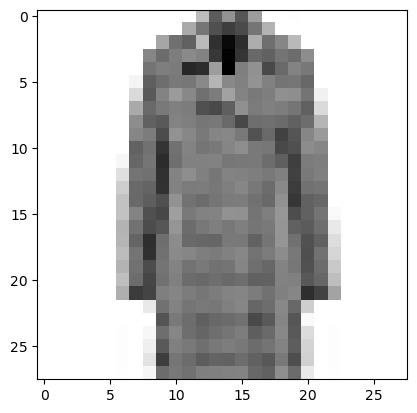

LABEL: 4
INPUT:


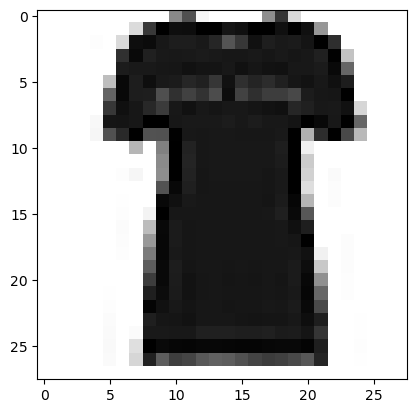

LABEL: 0
INPUT:


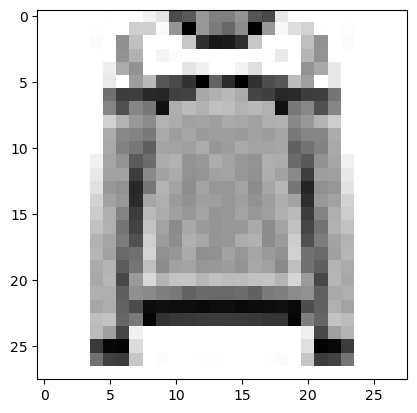

LABEL: 2


In [32]:
# let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,10000)

**TO DO A.2** Now **use a feed-forward Neural Network** for prediction. <br><br>
Use the **multi-layer perceptron** classifier, with the following parameters: <br>
`max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID` <br>
The `random_state` parameter ensures the run is the same even if you run it more than once, while the `alpha` parameter is the regularization term.<br>
You might get some **warnings about the convergence**, ignore them (or try to increase the max_iter parameter if you have a powerful computer). <br>

Then, using the default activation function, **pick four or five architectures** to consider, with different numbers of hidden layers and different sizes. <br>
It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 100. <br>
Evaluate the architectures you chose using **GridSearchCV with cv=5**. <br>

You can reduce the number of iterations if the running time is too long on your computer.

In [37]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (25,), (50,), (25,10,), (50,25,10) ]} #original value
#parameters = {'hidden_layer_sizes': [(10,), (17,), (18,), (25,), (50,), (100,), (25,10,), (18, 10), (18, 25), (50, 25, 50), (25,50,100), (25, 18, 50, 100) ]} #values that I used to test hypotesis

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID) # ADD YOUR CODE HERE

mlp_arch_CV = GridSearchCV(mlp, parameters, cv=5) # ADD YOUR CODE HERE
mlp_arch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:", mlp_arch_CV.best_params_)
# ADD YOUR CODE HERE

print("Score with best parameters:", mlp_arch_CV.best_score_)
# ADD YOUR CODE HERE

print("\nMean scores on the grid:", mlp_arch_CV.cv_results_['mean_test_score'])
# ADD YOUR CODE HERE

RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (25,)}
Score with best parameters: 0.79

Mean scores on the grid: [0.352 0.79  0.782 0.566 0.694]


**TO DO A.3** Now **try different batch sizes**, while keeping the **best NN** architecture you have found above. <br>
Remember that the batch size was previously set to the default value, i.e., `min(200, n_samples)`. <br>

Recall that a **batch size of 1 corresponds to baseline SGD**, while using all the **400 training samples** (there are 500 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to **standard GD** and using a different mini-batch size lies in the middle between the two extreme cases.

In [41]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 400]}
#parameters = {'batch_size': [32]}



# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5) # ADD YOUR CODE HERE, suggestion: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
best_hidden_layer_sizes = (25,)# ADD YOUR CODE HERE
mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID) # ADD YOUR CODE HERE

# recall to use cv=kf to use the k-fold subdivision seen in the lectures
mlp_batch_CV = GridSearchCV(mlp, parameters, cv=kf)# ADD YOUR CODE HERE
mlp_batch_CV.fit(X_train, y_train)

print ('RESULTS FOR NN\n')
print("Best parameters set found:", mlp_batch_CV.best_params_)
# ADD YOUR CODE HERE

print("Score with best parameters:", mlp_batch_CV.best_score_)
# ADD YOUR CODE HERE

print("\nAll scores on the grid:", mlp_arch_CV.cv_results_['mean_test_score'])
# ADD YOUR CODE HERE

RESULTS FOR NN

Best parameters set found: {'batch_size': 400}
Score with best parameters: 0.8

All scores on the grid: [0.352 0.79  0.782 0.566 0.694]


**TO DO A.Q1**

- What do you observe for different architectures and batch sizes? <br>
- How do the number of layers and their sizes affect the performances? <br>
- What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

<div class="alert alert-block alert-info">
**ANSWER A.Q1**:<br>
1./2. For different architectures I observe that increasing the number of neuron seems to lower the score, while increasing the number of neuron makes the algorithm more efficient, even though the best score is obtained by the single layer 25 neuron architecture. Toying with the architecture I discoverd that single layer 18 neurons is an even better solution, but only of a few percentage points. 
3. I observe that the bigger is the batch size the more the score seems to improve, indeed using a batch of 1 makes the algoritmn very unstable and the score drop very near to 0.
    </div>

**TO DO A.4** Now **try** to use **different learning rates**, while keeping the **best NN architecture and batch size you have found above.** <br>
**Plot the learning curves** (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. <br>
You might get warnings about the convergence, this is expected. Ignore them.

/home/vepe/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vepe/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vepe/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vepe/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


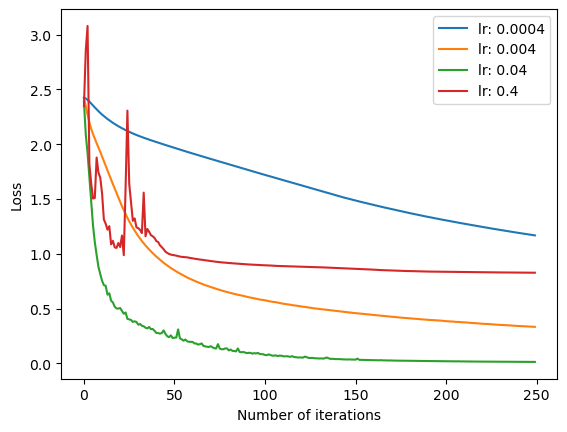

RESULTS FOR NN



/home/vepe/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vepe/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters set found: {'batch_size': 400}
Score with best parameters: 0.386


/home/vepe/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


In [69]:
lr_list = [4*10**exp for exp in range(-4,0)]
scores = {}

best_hidden_layer_sizes = (25,) # ADD YOUR CODE HERE
best_batch_size = 400 # ADD YOUR CODE HERE

for lr in lr_list: 
    mlp = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes,learning_rate='adaptive', learning_rate_init=lr, batch_size=best_batch_size,max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID) # ADD YOUR CODE HERE
    mlp.fit(X_train, y_train)
    scores[lr] = mlp.score(X_test, y_test) # ADD YOUR CODE HERE, score on the test set
    plt.plot(mlp.loss_curve_, label='lr: ' + str(lr))

plt.legend(loc = 1)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

print ('RESULTS FOR NN\n')
parameters={'batch_size': [1, 32, 400]}
mlp_batch_CV = GridSearchCV(mlp, parameters, cv=kf)# ADD YOUR CODE HERE
mlp_batch_CV.fit(X_train, y_train)
print("Best parameters set found:", mlp_batch_CV.best_params_)  # ADD YOUR CODE HERE

print("Score with best parameters:", mlp_batch_CV.best_score_) # ADD YOUR CODE HERE

**Question A.Q2** Comment about the learning curves (i.e. the variation of the loss over the steps). <br>
How does the curve changes for different learning rates in terms of stability and speed of convergence ?

<div class="alert alert-block alert-info">
**ANSWER A.Q2**:<br>
The learing curve seems to get steeper and steeper the bigger the learning rate becomes, but it looses stability when it reaches the lr=0.4 and still converges in 250 steps. Moreover is it possible to see that over the 50 steps the loss stabilize to the minimum it can get for the specific learning rate value.
    </div>

**TO DO A.5** Now get **training and test error** for a NN with best parameters (architecture, batch size and learning rate)from above. Plot the learning curve also for this case. <br>
As before, you might get a convergence warning, you can safely ignore it.

/home/vepe/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(



RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.225227


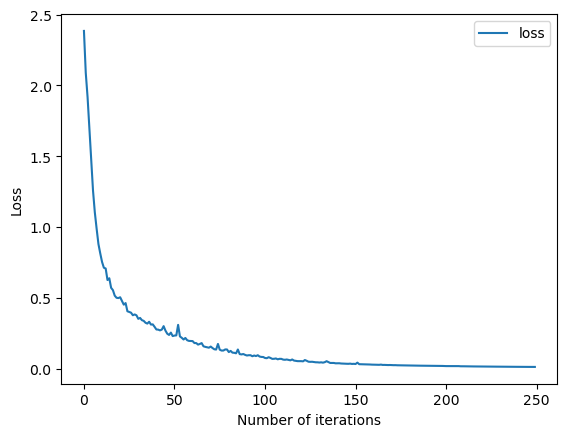

In [71]:
#get training and test error for the best NN model from CV
mlp = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes,learning_rate='adaptive', learning_rate_init=0.04, batch_size=best_batch_size, max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID) # ADD YOUR CODE HERE
# ADD YOUR CODE HERE
mlp.fit(X_train, y_train)

training_error = 1 - mlp.score(X_train,y_train)# ADD YOUR CODE HERE
test_error = 1 - mlp.score(X_test,y_test) # ADD YOUR CODE HERE

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_, label="loss")
plt.legend(loc = 1)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.show()

## B) More data 
Now let's do the same but **using 20000** (or less if it takes too long on your machine) **data points for training**. <br>
Make sure you are **consistent with the choice of `m_training`** in this and the later cells. <br>
Use the **same NN architecture** as before, but you can try more if you like and have a powerful computer!!

In [72]:
X = X[permutation]
y = y[permutation]

m_training = 20000 # ADD YOUR CODE HERE

X_train, X_test = X[:m_training], X[m_training:]# ADD YOUR CODE HERE
y_train, y_test = y[:m_training], y[m_training:] # ADD YOUR CODE HERE

labels, freqs = np.unique(y_train, return_counts=True) # ADD YOUR CODE HERE
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [1992 2037 2001 2036 1986 1957 1932 2001 2022 2036]


**TO DO B.1** Train the NNs with the added data points using the optimum parameters found above. <br>
Eventually, feel free to try different architectures if you like. <br>
We suggest that you use `verbose=True` so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50). <br>
This is just for debug purposes, **remember to switch it off** once you found a setup you like. <br>
As before, you might get a convergence warning (especially if you reduced the number of iterations), you can safely ignore it.

In [75]:
mlp_large = MLPClassifier(hidden_layer_sizes=best_hidden_layer_sizes, learning_rate='adaptive', learning_rate_init=0.04, batch_size=best_batch_size, max_iter=50, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, verbose=True)# ADD YOUR CODE HERE
mlp_large.fit(X_train, y_train)

print ('\nRESULTS FOR NN\n')

#get training and test error for the NN
training_error = 1 - mlp_large.score(X_train, y_train)# ADD YOUR CODE HERE
test_error = 1 - mlp_large.score(X_test, y_test)# ADD YOUR CODE HERE
print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)

Iteration 1, loss = 1.02655775
Iteration 2, loss = 0.56367222
Iteration 3, loss = 0.50424014
Iteration 4, loss = 0.46835660
Iteration 5, loss = 0.44893228
Iteration 6, loss = 0.43197130
Iteration 7, loss = 0.41546341
Iteration 8, loss = 0.40644500
Iteration 9, loss = 0.39082027
Iteration 10, loss = 0.38748443
Iteration 11, loss = 0.37486796
Iteration 12, loss = 0.36927007
Iteration 13, loss = 0.35922345
Iteration 14, loss = 0.35231768
Iteration 15, loss = 0.34527369
Iteration 16, loss = 0.34363155
Iteration 17, loss = 0.33640645
Iteration 18, loss = 0.32804278
Iteration 19, loss = 0.32585903
Iteration 20, loss = 0.32540757
Iteration 21, loss = 0.31641869
Iteration 22, loss = 0.31094431
Iteration 23, loss = 0.30732163
Iteration 24, loss = 0.30452765
Iteration 25, loss = 0.30154640
Iteration 26, loss = 0.30086258
Iteration 27, loss = 0.29733933
Iteration 28, loss = 0.29190273
Iteration 29, loss = 0.28708051
Iteration 30, loss = 0.28511212
Iteration 31, loss = 0.28108908
Iteration 32, los

/home/vepe/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


**Question B.Q1** Compare the train and test error you got with a large number of samples with the best one you obtained with only 500 data points. Comment about the results you obtained.

<div class="alert alert-block alert-info">
**ANSWER B.Q1**:<br>
As it possible to see in the following table, the training error for the 500 data points is 0, possible reason is the overfitting of the data. As expected for the test error it decreases as the number of data points gets bigger 
    </div>

In [82]:
import pandas as pd
df = pd.DataFrame(
    { 'm_training' : [500, 20000],
      'training error' : np.array([ 0.0000000, 0.076300]),
      'test error': np.array([ 0.225227, 0.137025]),
    }
)
df

,m_training,training error,test error
0,500,0.0000,0.225227
1,20000,0.0763,0.137025


**TO DO B.2** Plot an example that was missclassified by NN with m=500 training data points and it is now instead correctly classified by NN with m=20000 training data points.

INPUT:


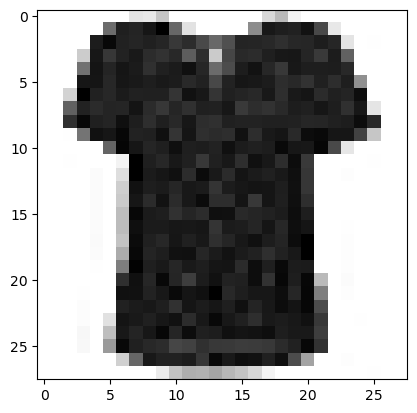

LABEL: 6
NN prediction for m=500: 0
NN prediction for m=20000: 6


In [83]:
NN_prediction = mlp.predict(X_test)# ADD YOUR CODE HERE
large_NN_prediction = mlp_large.predict(X_test)# ADD YOUR CODE HERE

for i, (p, pl, l) in enumerate(zip(NN_prediction, large_NN_prediction, y_test)):
    if p != l and pl == l:
        plot_input(X_test, y_test, i)
        print("NN prediction for m=500:", p)
        print("NN prediction for m=20000:", pl)
        break

**TO DO B.3** Plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 500 data points and with 20000 data points. <br>
Note that the code is provided, you just need to change the `mlp` variable name to the one used before - if you changed it.  

Weights with 500 data points:


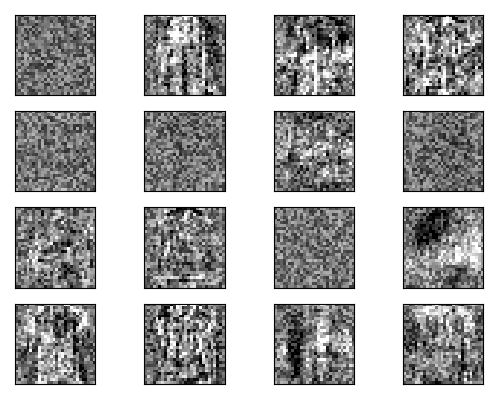

Weights with 20000 data points:


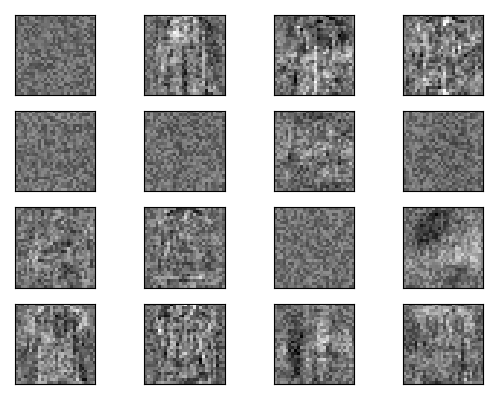

In [84]:
print("Weights with 500 data points:")
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 20000 data points:")
fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

**Question B.Q2** Describe what do you observe by looking at the weights

<div class="alert alert-block alert-info">
**ANSWER B.Q2**:<br>
Increasing the number of data points in the training set seems to dimmer the values of the weight of the multi-layer preceptron classifier
    </div>

**TO DO B.4** Create a SVM classifier with the following parameters: `kernel='rbf', C=10, gamma=0.01`. <br>
Fit it on a few data points and compute its training and test scores.

In [89]:
m_training = 20000 # ADD YOUR CODE HERE

X_train, X_test = X[:m_training], X[m_training:]# ADD YOUR CODE HERE
y_train, y_test = y[:m_training], y[m_training:]# ADD YOUR CODE HERE

# best parameters found in the SVM notebook
SVM = SVC(kernel = 'rbf', C=10, gamma=0.01) # ADD YOUR CODE HERE
SVM.fit(X_train, y_train)


print ('RESULTS FOR SVM')
SVM_training_error = 1 - SVM.score(X_train, y_train) # ADD YOUR CODE HERE

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1 - SVM.score(X_test, y_test) # ADD YOUR CODE HERE
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.02034999999999998
Test score SVM:
0.11140000000000005


**Question B.Q3** Compare the results of SVM and of NN. Which one achieves the best performances? 

<div class="alert alert-block alert-info">
**ANSWER B.Q3**:<br>
For the the training error is greater for the NN. Since the most important result for the performance of an angolirthm is the test error the model of the SVM is preferable due to the fact that its test error's value is lower. 
    </div>

In [90]:
df = pd.DataFrame(
    { 'Model' : ['NN', 'SVM'],
      'training error' : np.array([0.076300, 0.02035]),
      'test error': np.array([0.137025, 0.11140]),
    }
)
df

,Model,training error,test error
0,NN,0.07630,0.137025
1,SVM,0.02035,0.111400
